### Fish Weight Modeling for Market Insights

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

#### Load the Dataset

In [3]:
# Load the dataset from the provided URL
import pandas as pd
url = r"C:\Users\bbuser\Desktop\Jupyter\Fish.csv"
df = pd.read_csv(url)

In [5]:
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


#### Data Cleaning and Preprocessing

In [7]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['Length1', 'Length2', 'Length3', 'Height', 'Width']] = imputer.fit_transform(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])

# Encode categorical 'Species' column
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

# Split the dataset into training and testing sets
X = df.drop('Weight', axis=1)
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exploratory Data Analysis and Feature Engineering
##### Visualize Key Features

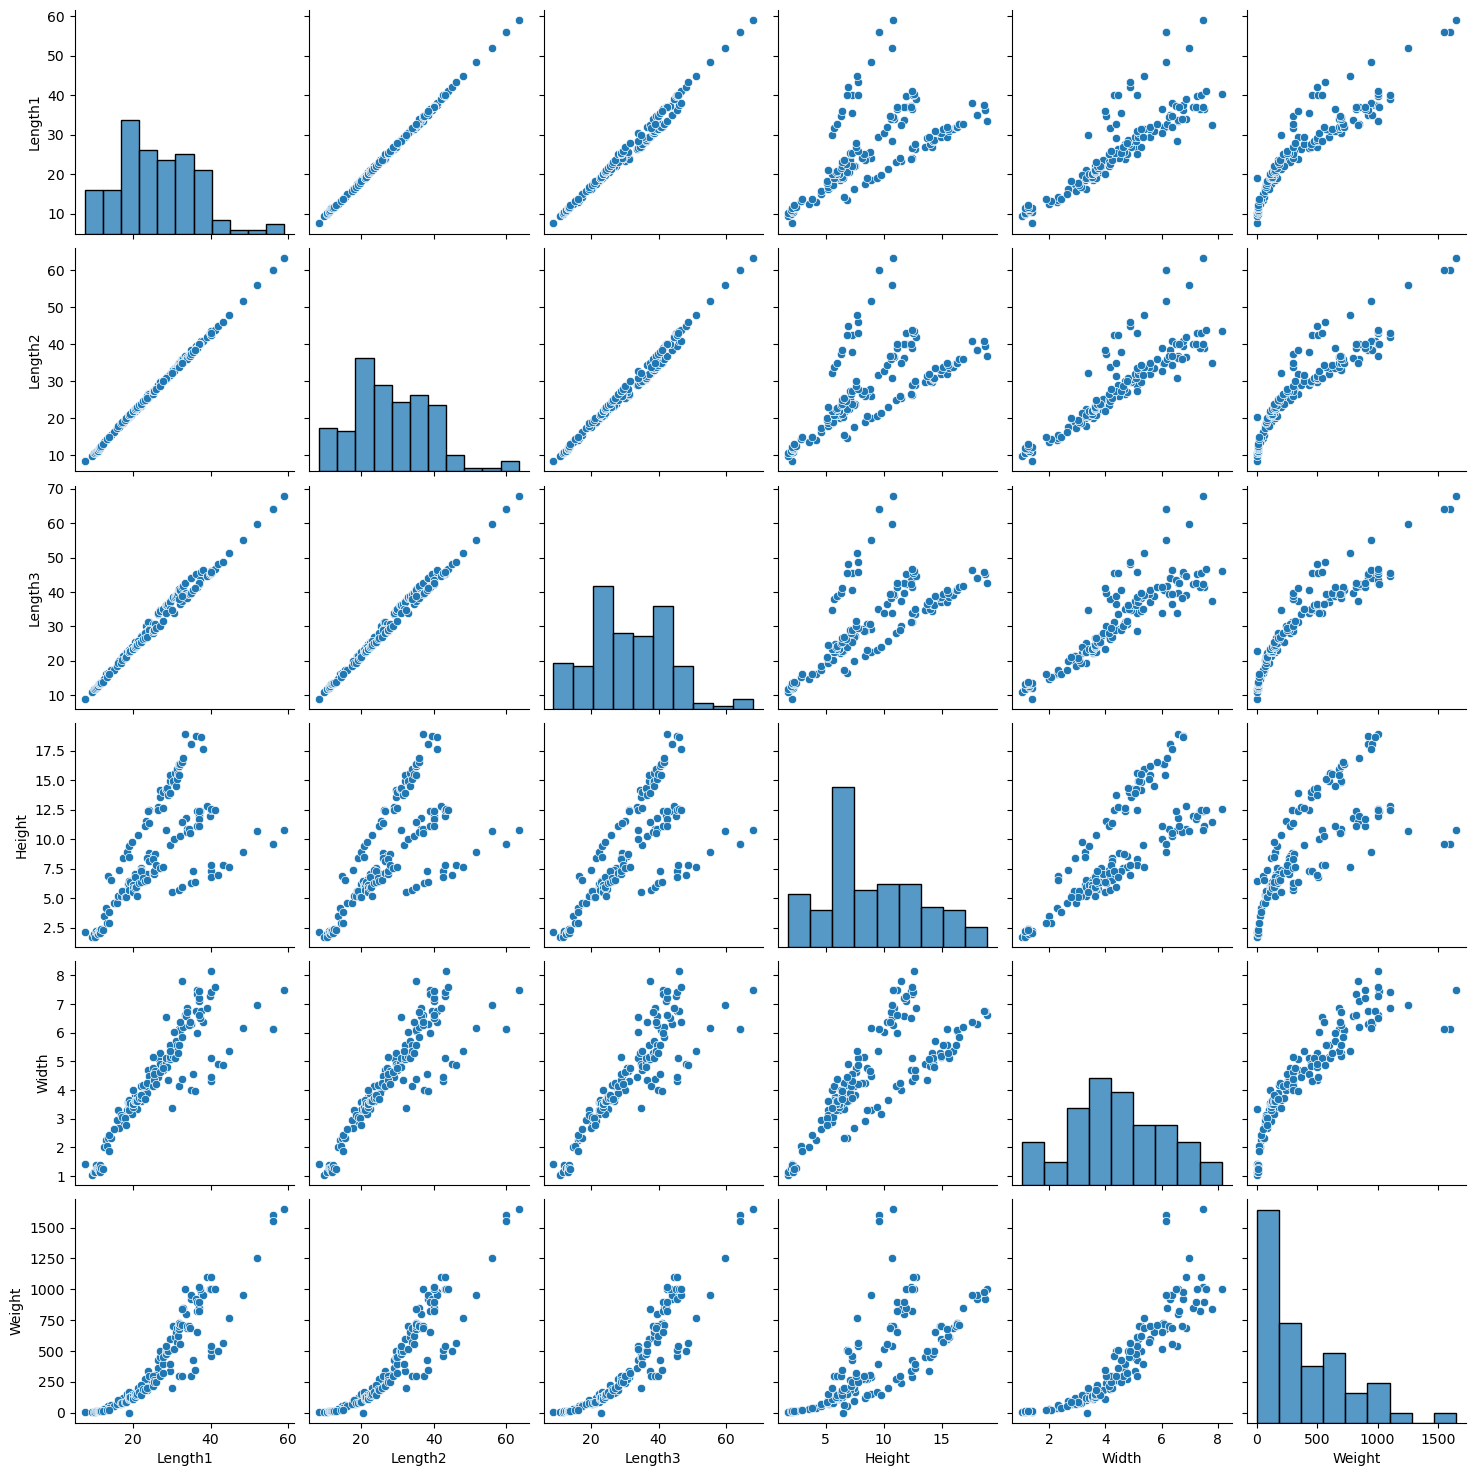

In [12]:
# Scatter plot to visualize relationships
sns.pairplot(df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']])
plt.show()

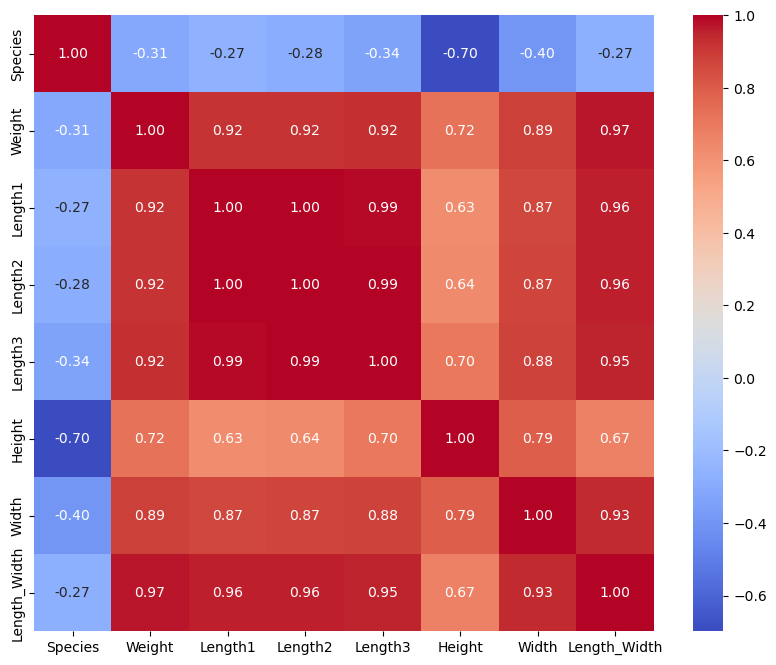

In [13]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Handle Outliers

In [14]:
# Identify outliers using IQR
Q1 = df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']].quantile(0.25)
Q3 = df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']] < (Q1 - 1.5 * IQR)) | (df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Feature Engineering

In [15]:
# Create new feature: Interaction between Length and Width
df['Length_Width'] = df['Length1'] * df['Width']

#### Visualize Distributions

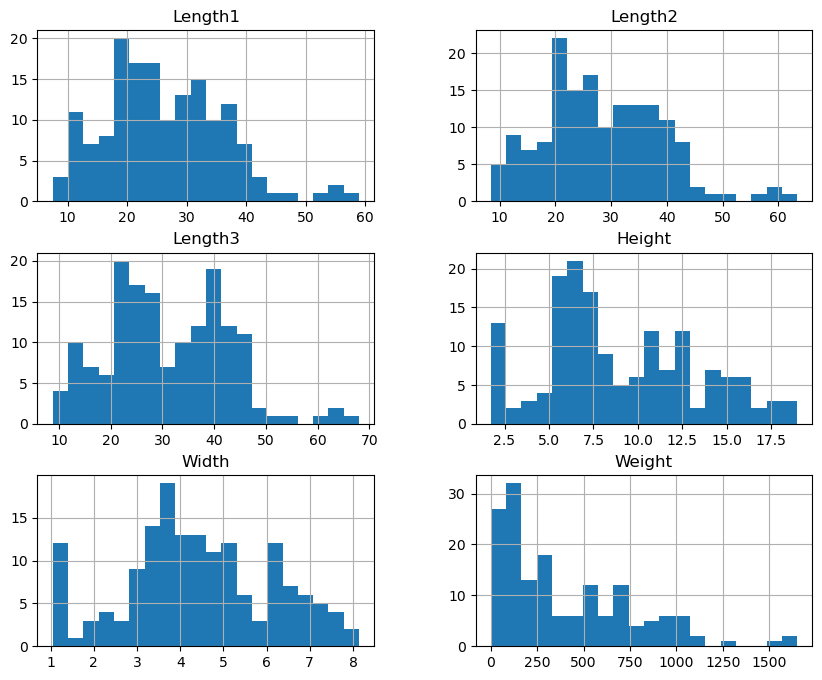

In [17]:
# Histograms for key features
df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']].hist(bins=20, figsize=(10, 8))
plt.show()

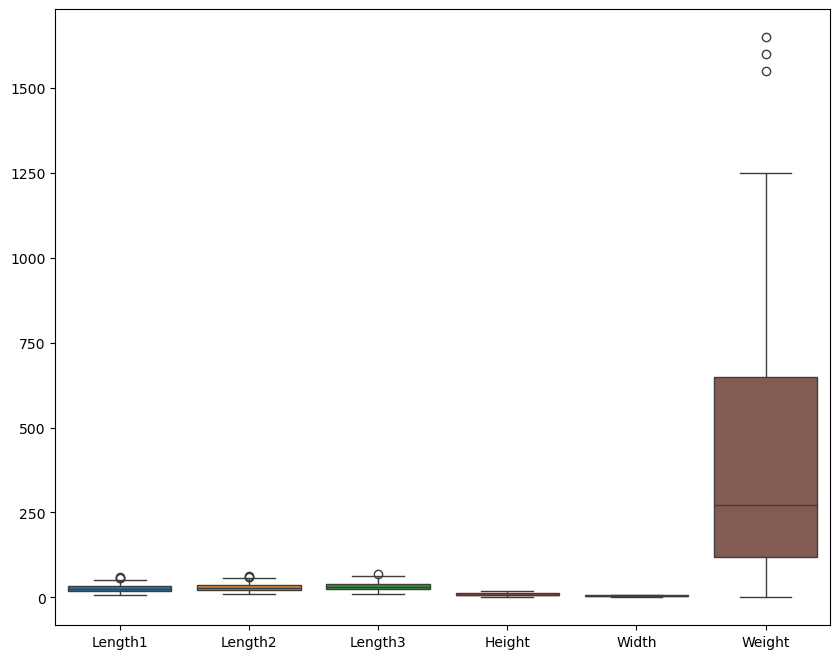

In [18]:
# Box plots to visualize distributions
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']])
plt.show()

#### Model Development and Comparison
##### Train Regression Models

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Polynomial Regression': PolynomialFeatures(degree=2)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    if name == 'Polynomial Regression':
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X_train)
        model = LinearRegression()
        model.fit(X_poly, y_train)
        X_test_poly = poly.transform(X_test)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

# Display results
pd.DataFrame(results).T.sort_values(by='RMSE')


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.372e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


,RMSE,R2
Polynomial Regression,61.714820,0.973223
Lasso Regression,116.308482,0.904895
Linear Regression,117.165765,0.903488
Ridge Regression,117.233000,0.903377
